# Problem formulation

The problem we have focused on is predicting the global temperature anomaly based on concentration of gases in the atmosphere. Data is collected from year 2001 to 2022. 
<br> <br> The result of our research can show directly how the global warming is going to change in the future years. This information can be useful for preparing society for the impact of temperature changes. It can also show how our population influence global weather changes because of gases emission.<br> <br>
Data used in our project come from two different sources. Data about global temperature anomaly comes from NASA Global Climate Change https://climate.nasa.gov/vital-signs/global-temperature/ and the gases concentration comes from Global Monitoring Laboratory https://gml.noaa.gov/. The first one contains yearly temperature anomaly around the globe. Originally data was in year range 1880-2023. The second data set has information about three gases concentration in the atmosphere. It not only has yearly data but also monthly.
<br> <br>
Before starting the project we created the dag graph that shows what data impacts global warming. 
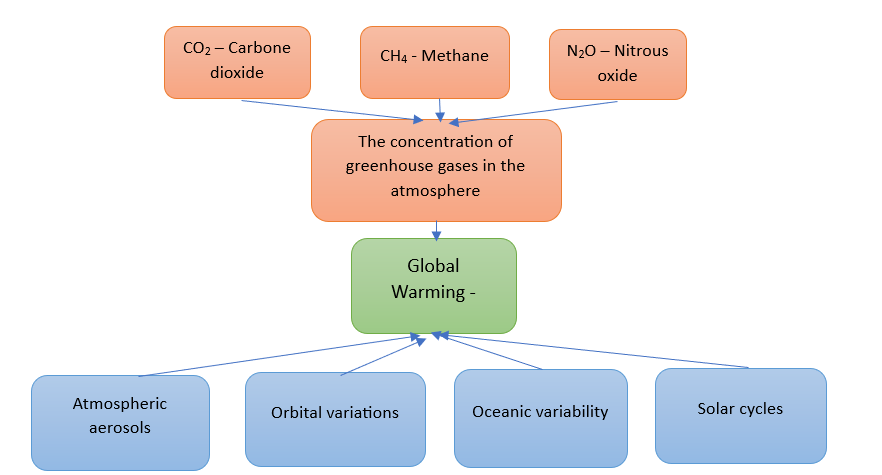. <br> The parameters we have taken into consideration are carbon dioxide(CO2), methan(CH4), nitrous oxide(N2O). Although there were more factors than only gases the ones we have chosen had the most impact on changes in the temperature. <br><br>

# Data preprocessing

As the data were clear without any NaN or Null values we didn't change much while cleaning it. We had to compute the mean value for every year when it comes to gases because the data had values for every month which we didn't need to use. 

### Imports

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from cmdstanpy import CmdStanModel
from sklearn.preprocessing import StandardScaler
import arviz as az

df = pd.read_csv("root/data/data_preprocessed/data.csv", index_col=0)

### Data standarization

In [4]:
df.head()

,year,CO2,CH4,N2O,Temperature
0,2001,371.319167,1771.269167,316.364167,0.54
1,2002,373.452500,1772.731667,316.942500,0.63
2,2003,375.983333,1777.334167,317.631667,0.62
3,2004,377.698333,1776.995833,318.262500,0.53
4,2005,379.983333,1774.180000,318.920000,0.68


In [5]:
df.describe()

,year,CO2,CH4,N2O,Temperature
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2011.500000,394.154091,1817.905000,325.018220,0.744091
std,6.493587,14.618055,43.282048,5.969065,0.158284
min,2001.000000,371.319167,1771.269167,316.364167,0.530000
25%,2006.250000,382.574375,1778.368750,319.980625,0.632500
50%,2011.500000,392.953333,1805.632917,324.638333,0.680000
75%,2016.750000,406.171875,1848.098542,329.547083,0.887500
max,2022.000000,418.564167,1911.968333,335.662500,1.020000


Data was standarized using StandardScaler class form sklearn. We wanted to have our parameters in the similar range and in not so big scale as they were before. The standard score of a sample x is calculated as:
z = (x - u) / s
where u is the mean of the training sample, and s is the standard deviation of the training samples. 

In [25]:
scaler = StandardScaler()
df[['CO2', 'CH4', 'N2O']] = scaler.fit_transform(df[['CO2', 'CH4', 'N2O']])

print(df)

    year       CO2       CH4       N2O  Temperature
0   2001 -1.598865 -1.102843 -1.483935         0.54
1   2002 -1.449492 -1.068258 -1.384767         0.63
2   2003 -1.272287 -0.959418 -1.266593         0.62
3   2004 -1.152206 -0.967419 -1.158423         0.53
4   2005 -0.992214 -1.034008 -1.045679         0.68
5   2006 -0.844650 -1.015326 -0.890782         0.64
6   2007 -0.709223 -0.861555 -0.782897         0.67
7   2008 -0.582723 -0.728771 -0.602136         0.54
8   2009 -0.455931 -0.575395 -0.469245         0.66
9   2010 -0.283744 -0.448149 -0.312204         0.73
10  2011 -0.161270 -0.348670 -0.137302         0.61
11  2012 -0.006880 -0.231750  0.007021         0.65
12  2013  0.180886 -0.105253  0.159489         0.68
13  2014  0.326174  0.114358  0.355969         0.75
14  2015  0.480156  0.389186  0.541731         0.90
15  2016  0.718277  0.598510  0.674336         1.02
16  2017  0.882529  0.752518  0.810657         0.92
17  2018  1.019531  0.934489  1.010995         0.85
18  2019  1.

In [16]:
#TODO Alternative standarization way
df['CO2'] /= 100
df['CH4'] /= 1000
df['N2O'] /= 100

df['CO2'] = df['CO2'] - df['CO2'].mean()
df['CH4'] = df['CH4'] - df['CH4'].mean()
df['N2O'] = df['N2O'] - df['N2O'].mean()
df

,year,CO2,CH4,N2O,Temperature
0,2001,-0.228349,-0.046636,-0.086541,0.54
1,2002,-0.207016,-0.045173,-0.080757,0.63
2,2003,-0.181708,-0.040571,-0.073866,0.62
3,2004,-0.164558,-0.040909,-0.067557,0.53
4,2005,-0.141708,-0.043725,-0.060982,0.68
5,2006,-0.120633,-0.042935,-0.051949,0.64
6,2007,-0.101291,-0.036432,-0.045657,0.67
7,2008,-0.083224,-0.030817,-0.035116,0.54
8,2009,-0.065116,-0.024332,-0.027366,0.66
9,2010,-0.040524,-0.018951,-0.018207,0.73


#### Checking id data is suitable for normal model

In [68]:

normality_test = stats.normaltest(np.array(df['Temperature']))

# Wyświetlanie wyników testu
print("Statystyka testu: ", normality_test.statistic)
print("Wartość p-wartości: ", normality_test.pvalue)

# Sprawdzenie interpretacji wyników testu
alpha = 0.05
if normality_test.pvalue < alpha:
    print("Dane nie pochodzą z rozkładu normalnego")
else:
    print("Dane są zgodne z rozkładem normalnym")

Statystyka testu:  3.3440751699526974
Wartość p-wartości:  0.18786388675829657
Dane są zgodne z rozkładem normalnym


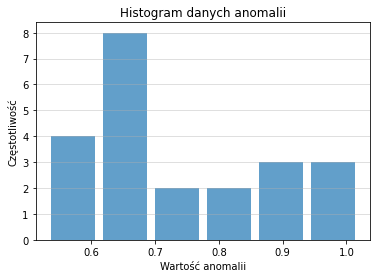

In [10]:
plt.hist(np.array(df['Temperature']), bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.5)
plt.xlabel('Anomaly value')
plt.ylabel('Frequency')
plt.title('Histogram of anomaly data')
plt.show()

From histogram above we can see that the data doesn't have strong resemblance for any of distributions. At first we thought about Gamma distribution but after some actions the results weren't satisfying so we decided to go with  Normal Distribution

_________________________________________________________

# Model 1 - Normal Distribution

Our first approach is creating model with Normal Distribution. It is characterized by its symmetric bell shaped curve. It is defined by two parameters mean and standard deviation. It is symmetric around mean value that means that mean represents  center of distribution while the standard deviation determines the spread of the data. <br> <br> 
On below plots we can see that correlation between our parameters and temperature data can be considered to be linear and that is why we have chosen this approach in the model. <br> <br> Standard Bayesian model: $outcome_{i}$ ~ Normal($\mu_{i}$, $\sigma$)
    $\mu_{i}$ = $\alpha$+ $\beta$ * $predictor_{i}$
    $\alpha$ ~ Normal(a,b)
    $\beta$ ~ Normal(c,d)
    $\sigma$ ~ Normal(f,g)

As we have three predictors the sum of multiplications beta and predictors is added two more times to the equation.

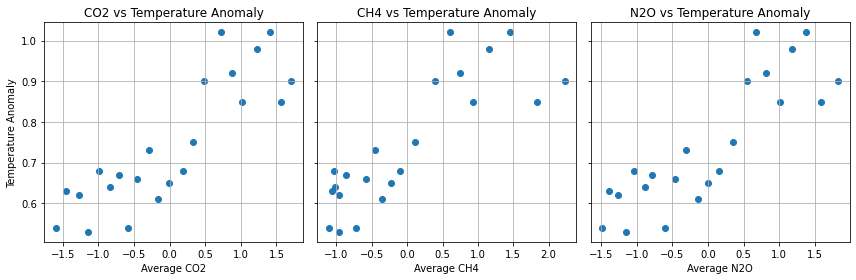

In [73]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axs[0].scatter(df['CO2'], df['Temperature'])
axs[0].set_xlabel('Average CO2')
axs[0].set_ylabel('Temperature Anomaly')
axs[0].set_title('CO2 vs Temperature Anomaly')
axs[0].grid()

axs[1].scatter(df['CH4'], df['Temperature'])
axs[1].set_xlabel('Average CH4')
axs[1].set_title('CH4 vs Temperature Anomaly')
axs[1].grid()

axs[2].scatter(df['N2O'], df['Temperature'])
axs[2].set_xlabel('Average N2O')
axs[2].set_title('N2O vs Temperature Anomaly')
axs[2].grid()

plt.tight_layout()
plt.show()

## Prior

Alpha is normal distribution is based on the mean value of Temperature anomaly in the data set and sigma is based on standard deviation od the same data. Beta for every predictor and sigma is also normal distribution. The parameters for distribution of beta where chosen considering the output of this prior model. It was the most difficult challenge to  fir beta parameters properly. 

In [74]:
%%writefile root/stan_files/temp3_ppc.stan
data {
  int<lower=0> N;
  vector[N] CO2;
  vector[N] CH4;
  vector[N] N2O;
}

generated quantities {
  real alpha = normal_rng(0.7, 0.1);
  real beta_CO2 = normal_rng(0, 0.1);
  real beta_CH4 = normal_rng(0, 0.1);
  real beta_N2O = normal_rng(0, 0.1);
  real sigma = normal_rng(0.1, 0.02);
  vector[N] temperature;

  for (i in 1:N) {
    temperature[i] = normal_rng(alpha + beta_CO2 * CO2[i] + beta_CH4 * CH4[i] + beta_N2O * N2O[i], sigma);
  }
}


Overwriting root/stan_files/temp3_ppc.stan


In [75]:
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2.min(),df.CO2.max(),len(df)),'CH4':np.linspace(df.CH4.min(),df.CH4.max(),len(df)),'N2O':np.linspace(df.N2O.min(),df.N2O.max(),len(df))}
model_ppc2=CmdStanModel(stan_file='root/stan_files/temp3_ppc.stan')
R = 1000
sim=model_ppc2.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp3_ppc.stan to exe file /root/stan_files/temp3_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp3_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [76]:
ppc_df = sim.draws_pd()
ppc_df.head()

,lp__,accept_stat__,alpha,beta_CO2,beta_CH4,beta_N2O,sigma,temperature[1],temperature[2],temperature[3],...,temperature[13],temperature[14],temperature[15],temperature[16],temperature[17],temperature[18],temperature[19],temperature[20],temperature[21],temperature[22]
0,0.0,0.0,0.970817,0.077718,-0.127227,0.012759,0.072212,0.985710,1.048590,1.119710,...,0.854489,0.911704,0.880068,0.887731,0.919615,0.931942,0.844500,0.862722,0.726557,0.851031
1,0.0,0.0,0.635055,0.118083,-0.014296,-0.015998,0.112775,0.534230,0.179542,0.630123,...,0.863881,0.838968,0.708483,0.537071,0.646070,0.689926,0.820564,0.780421,0.834648,0.640667
2,0.0,0.0,0.699322,-0.000371,0.121486,0.075957,0.114794,0.588463,0.623650,0.606261,...,0.792784,0.899589,0.881236,0.767561,1.034040,1.184980,0.975659,0.824738,1.118990,1.120850
3,0.0,0.0,0.606081,0.106421,-0.002303,0.037027,0.088234,0.462742,0.446727,0.355780,...,0.570904,0.658725,0.610738,0.762513,0.647393,0.752692,0.898824,0.799267,0.790523,0.749964
4,0.0,0.0,0.577813,0.141649,-0.018822,-0.016031,0.112103,0.440043,0.511638,0.191112,...,0.558346,0.491609,0.602761,0.621372,0.716101,0.585402,0.747984,0.789003,0.786724,0.607919


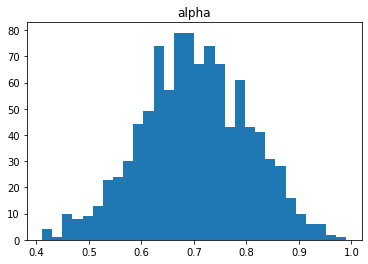

In [84]:
plt.hist(ppc_df['alpha'], bins=30)
plt.title('alpha')
plt.show()

Parameter alpha is in the right range and is wider on the center which is good.

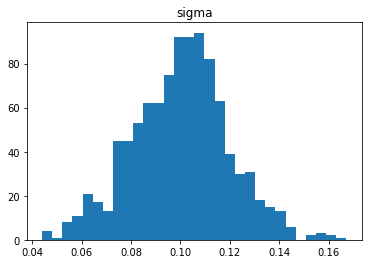

In [85]:
plt.hist(ppc_df['sigma'], bins=30)
plt.title('sigma')
plt.show()

Parameter sigma looks also okay with tha values at the meant range

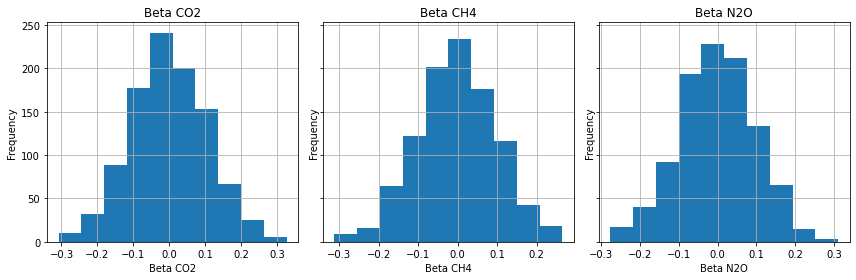

In [87]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))

axs[0].hist(ppc_df['beta_CO2'])
axs[0].set_xlabel('Beta CO2')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Beta CO2')
axs[0].grid()

axs[1].hist(ppc_df['beta_CH4'])
axs[1].set_xlabel('Beta CH4')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Beta CH4')
axs[1].grid()

axs[2].hist(ppc_df['beta_N2O'])
axs[2].set_xlabel('Beta N2O')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Beta N2O')
axs[2].grid()

plt.tight_layout()
plt.show()

As we put the same values for beta distribution parameters for predictors they histograms look almost the same. We wanted for all the predictors to have the same impact on our model. 

Text(80, 20, 'min')

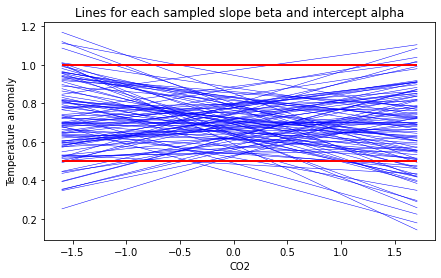

In [78]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = sim.stan_variable('beta_CO2')
alpha_humid = sim.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled slope beta and intercept alpha")
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.hlines([0.5, 1],xmin = df['CO2'].min(), xmax = df['CO2'].max(), linestyles = '-',linewidth = 2, color = 'r')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

This model fits just fine. Those lines that are under or above min and max values on the plot are acceptable because temperature anomaly can go below 0.5 (even below 0) and above 1. After fitting the data to the model everything should be between those lines perfectly. 

Lets see how the actual temperature data corresponds with the data from prior.

Text(80, 20, 'min')

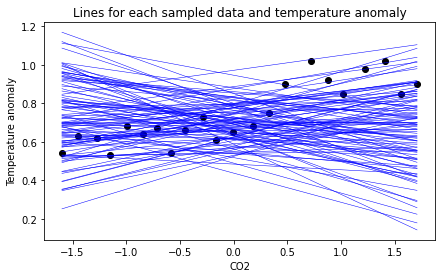

In [81]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = sim.stan_variable('beta_CO2')
alpha_humid = sim.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled data and temperature anomaly")
axes.scatter(df['CO2'], df['Temperature'], color= 'black')
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

## Posterior predictive check

##### Fitting model to data

In [48]:
%%writefile root/stan_files/temp4_ppc.stan

data {
    int<lower=0> N;
    vector[N] temp;
    vector[N] CO2;
    vector[N] CH4;
    vector[N] N2O;
}

parameters {
    real<lower=0> alpha;
    real<lower=0> sigma;
    real<lower=0> beta_CO2;
    real<lower=0> beta_CH4;
    real<lower=0> beta_N2O;
}

transformed parameters {
    vector[N] mean;
    for (i in 1:N) {
        mean[i] = alpha + beta_CO2 * CO2[i] + beta_CH4 * CH4[i] + beta_N2O * N2O[i];
    }
}

model {
    alpha ~ normal(0.7, 0.1);
    sigma ~ normal(0.1, 0.02);
    beta_CO2 ~ normal(0, 0.1);
    beta_CH4 ~ normal(0, 0.1);
    beta_N2O ~ normal(0, 0.1);
    for (i in 1:N) {
        temp[i] ~ normal(mean[i], sigma);
    }
}

generated quantities {
    vector[N] temp_;
    vector[N] log_lik;
    for (i in 1:N) {
        temp_[i] = normal_rng(mean[i], sigma);
        log_lik[i] = normal_lpdf(temp_[i]|mean[i], sigma);
    }
}


Overwriting root/stan_files/temp4_ppc.stan


In [52]:
model_1_fit=CmdStanModel(stan_file='root/stan_files/temp4_ppc.stan')
N = len(df)
data_fit = {'N': N, 'CO2': df.CO2.values[:N], 'temp': df.Temperature.values[:N], 'CH4': df.CH4.values[:N], 'N2O': df.N2O.values[:N]}
fit=model_1_fit.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


There were no issues with the sampling

In [50]:
df_ = fit.draws_pd()
df_.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta_CO2,...,log_lik[13],log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22]
0,27.9625,0.985636,0.167017,5.0,31.0,0.0,-27.1543,0.742672,0.098222,0.037101,...,0.418371,1.389580,0.909479,0.610863,0.854060,1.389200,0.446135,1.284320,-0.643606,1.26768
1,30.4195,0.999059,0.167017,5.0,31.0,0.0,-27.0724,0.747539,0.082064,0.046266,...,1.489310,0.153962,1.581290,0.519966,-0.033177,1.436920,1.380760,1.513080,-3.353400,1.54954
2,31.0292,0.994093,0.167017,5.0,31.0,0.0,-29.3316,0.736152,0.099784,0.070291,...,0.176925,-0.812033,-2.591740,1.385520,1.025260,1.371490,1.347590,1.221020,1.383010,1.37259
3,29.5738,0.978468,0.167017,4.0,15.0,0.0,-28.5692,0.707534,0.084646,0.040462,...,1.460780,1.083030,1.498680,-0.623255,0.146163,1.412070,1.408160,0.949363,1.061360,1.41005
4,28.9220,0.907824,0.167017,4.0,15.0,0.0,-26.5229,0.718149,0.100418,0.032382,...,0.689437,1.013680,0.833834,1.349390,-0.252048,0.725727,1.340430,1.205930,-1.550260,1.28491


Text(80, 20, 'min')

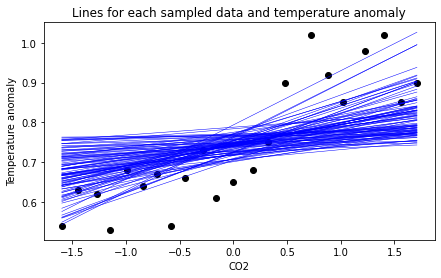

In [51]:
fig, axes = plt.subplots(1,1,figsize=(7,4))

beta_humid = fit.stan_variable('beta_CO2')
alpha_humid = fit.stan_variable('alpha')
for i in range(100):
    axes.plot(df['CO2'], alpha_humid[i]+beta_humid[i]*np.array(df['CO2']), linewidth = 0.5, color='b')
plt.title("Lines for each sampled data and temperature anomaly")
axes.scatter(df['CO2'], df['Temperature'], color= 'black')
axes.set_xlabel('CO2')
axes.set_ylabel('Temperature anomaly')
axes.annotate(text='max',xy=(80,320), weight = 'bold', color = 'r', fontsize = 15)
axes.annotate(text='min',xy=(80,20), weight = 'bold', color = 'r', fontsize = 15)

Now the lines are more adjusted to actual data. There are less data point on the center and so there is less wide lines there. As the data is spread at the ends  so are the lines 

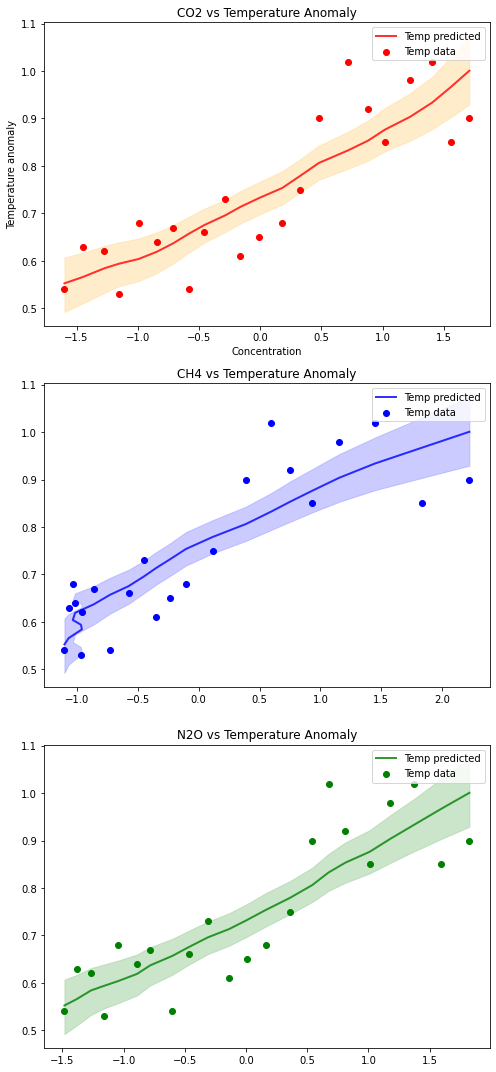

In [103]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

CO2 = np.array(df['CO2'])
CH4 = np.array(df['CH4'])
N2O = np.array(df['N2O'])
Temperature = np.array(df['Temperature'])
mu_CO2 = fit.stan_variable('mean')
mu_CH4 = fit.stan_variable('mean')
mu_N2O = fit.stan_variable('mean')


fig, ax = plt.subplots(3, 1, figsize=(7 ,15))

ax[0].fill_between(
    CO2,
    np.percentile(mu_CO2, 5, axis=0),
    np.percentile(mu_CO2, 95, axis=0),
    color=1 - 0.4 * (1 - np.array(mpl.colors.to_rgb('orange'))),
    alpha=0.5
)

ax[1].fill_between(
    CH4,
    np.percentile(mu_CH4, 5, axis=0),
    np.percentile(mu_CH4, 95, axis=0),
    color=1 - 0.4 * (1 - np.array(mpl.colors.to_rgb('blue'))),
    alpha=0.5
)

ax[2].fill_between(
    N2O,
    np.percentile(mu_N2O, 5, axis=0),
    np.percentile(mu_N2O, 95, axis=0),
    color=1 - 0.4 * (1 - np.array(mpl.colors.to_rgb('green'))),
    alpha=0.5
)

ax[0].plot(
    CO2,
    np.percentile(mu_CO2, 50, axis=0),
    color='red',
    linewidth=2,
    alpha=0.8,
    label='Temp predicted'
)
ax[1].plot(
    CH4,
    np.percentile(mu_CH4, 50, axis=0),
    color='blue',
    linewidth=2,
    alpha=0.8,
    label='Temp predicted'
)
ax[2].plot(
    N2O,
    np.percentile(mu_N2O, 50, axis=0),
    color='green',
    linewidth=2,
    alpha=0.8,
    label='Temp predicted'
)

ax[0].scatter(CO2, Temperature, color='red', label='Temp data')
ax[1].scatter(CH4, Temperature, color='blue', label='Temp data')
ax[2].scatter(N2O, Temperature, color='green', label='Temp data')

ax[0].set_xlabel('Concentration')
ax[0].set_ylabel('Temperature anomaly')


ax[0].legend()
ax[1].legend()
ax[2].legend()

ax[0].set_title('CO2 vs Temperature Anomaly')
ax[1].set_title('CH4 vs Temperature Anomaly')
ax[2].set_title('N2O vs Temperature Anomaly')
plt.tight_layout()
plt.show()



Shown output data is consistent with the provided data of temperatures anomaly. For each gases the output mean fits great.

### Marginal Distribution 

0.7803419999999998


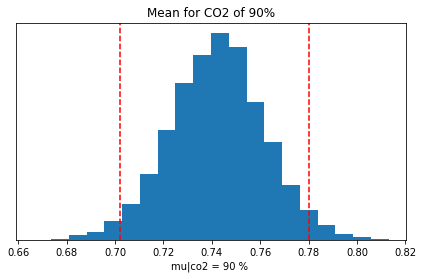

Mean: 0.74
95% confidence interval:  ['0.70', '0.78']


In [111]:
alpha_post =  fit.stan_variable('alpha')
beta_post = fit.stan_variable('beta_CO2')
mu_post = fit.stan_variable('mean')

mu90 = alpha_post+beta_post*(np.mean(df['CO2']))
mu_95p = az.hdi(mu90,.95)
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.hist(mu90,bins=20,density=True)
plt.axvline(mu_95p[0], linestyle = '--', color = 'r')
plt.axvline(mu_95p[1], linestyle = '--', color = 'r')
ax.set_title('Mean for CO2 of 90%')
ax.set_yticks(())
ax.set_xlabel('mu|co2 = 90 % ')
plt.show()
print('Mean: {:4.2f}'.format(np.mean(mu90)))
print('95% confidence interval: ',['{:4.2f}'.format(k) for k in az.hdi(mu90,.95)])

We can see form above histogram that on 90% propability the temperature anomaly will be in range 0.7 and 0.78. Th eother gases are not gonna be checked due to the similar data with CO2

# Model 2 - Student_t distribution 

## Prior

In [26]:
data_sim={'N':len(df), 'CO2':np.linspace(df.CO2.min(),df.CO2.max(),len(df)),'CH4':np.linspace(df.CH4.min(),df.CH4.max(),len(df)),'N2O':np.linspace(df.N2O.min(),df.N2O.max(),len(df))}

In [27]:
%%writefile root/stan_files/temp7_ppc_prior.stan
data {
  int<lower=0> N;
  vector[N] CO2;
  vector[N] CH4;
  vector[N] N2O;
}

generated quantities {
  real sigma = normal_rng(0.1,0.05);
  real nu = gamma_rng(2, 0.1);
  real alpha = normal_rng(0.7, 0.1);
  real beta_CO2 = normal_rng(0, 0.1);
  real beta_CH4 = normal_rng(0, 0.1);
  real beta_N2O = normal_rng(0, 0.1);
  vector[N] temperature;

  for (i in 1:N) {
    temperature[i] = student_t_rng(nu, alpha + beta_CO2 * CO2[i] + beta_CH4 * CH4[i] + beta_N2O * N2O[i], sigma);
  }
}


Overwriting root/stan_files/temp7_ppc_prior.stan


In [22]:
model_ppc7_p=CmdStanModel(stan_file='root/stan_files/temp7_ppc_prior.stan')
R = 1000
sim7=model_ppc7_p.sample(data=data_sim,
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)
df_7_p = sim7.draws_pd()
df_7_p.describe()

INFO:cmdstanpy:compiling stan file /root/stan_files/temp7_ppc_prior.stan to exe file /root/stan_files/temp7_ppc_prior
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp7_ppc_prior
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma,nu,alpha,beta_CO2,beta_CH4,beta_N2O,temperature[1],temperature[2],...,temperature[13],temperature[14],temperature[15],temperature[16],temperature[17],temperature[18],temperature[19],temperature[20],temperature[21],temperature[22]
count,1000.0,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,0.0,0.0,0.098238,18.929002,0.676493,-0.001292,0.003584,-0.004248,0.667328,52.862725,...,0.675233,0.250863,0.673188,-11.111240,0.668239,0.671958,1.588715e+03,0.648772,87.554937,0.678100
std,0.0,0.0,0.049166,14.048582,0.155187,0.097799,0.094731,0.101020,0.328884,1562.987647,...,0.206505,13.498100,0.203385,372.812931,0.225100,0.210807,5.061289e+04,0.774614,2747.865638,0.225800
min,0.0,0.0,0.000000,0.000000,0.000000,-0.294664,-0.281425,-0.343639,-6.338550,-0.043953,...,-1.647150,-426.121000,-0.711248,-11788.700000,-2.606670,-1.763160,-1.242280e+04,-23.001100,-11.032000,-0.264760
25%,0.0,0.0,0.064512,8.565048,0.626013,-0.066897,-0.057288,-0.071131,0.580184,0.585587,...,0.591071,0.594067,0.582608,0.590272,0.581134,0.588969,5.842305e-01,0.581998,0.586671,0.579499
50%,0.0,0.0,0.094809,16.042550,0.693544,-0.001030,0.001841,-0.000640,0.698753,0.688231,...,0.689974,0.694435,0.694633,0.693447,0.692938,0.689383,6.882325e-01,0.691771,0.688473,0.688198
75%,0.0,0.0,0.132957,25.829925,0.764688,0.063679,0.065212,0.058482,0.793877,0.782656,...,0.799032,0.793800,0.794264,0.802378,0.792101,0.785302,7.889637e-01,0.792412,0.785679,0.799623
max,0.0,0.0,0.242544,95.051300,1.011310,0.298178,0.284787,0.322800,3.467030,49347.400000,...,1.233640,1.285190,1.276830,2.170000,1.531000,1.374910,1.600460e+06,1.485750,86895.800000,3.081550


In [60]:
df_7_p = sim7.draws_pd()
df_7_p.head()

,lp__,accept_stat__,sigma,nu,alpha,beta_CO2,beta_CH4,beta_N2O,temperature[1],temperature[2],...,temperature[13],temperature[14],temperature[15],temperature[16],temperature[17],temperature[18],temperature[19],temperature[20],temperature[21],temperature[22]
0,0.0,0.0,68.97160,10.83360,0.693634,-0.127227,0.012759,-0.138942,17.94930,50.172600,...,-19.49900,68.79860,47.18720,-64.49050,-95.56320,48.12730,-140.45800,46.055000,70.11850,-9.54228
1,0.0,0.0,4.83888,20.63350,0.643012,0.104238,0.116276,0.188285,9.16563,1.627640,...,1.13098,5.19955,8.83696,3.53492,-8.73515,-7.52636,3.10609,0.871095,7.93969,5.10913
2,0.0,0.0,26.37580,26.19870,0.650050,0.024688,-0.058932,-0.001650,27.76750,0.054258,...,-2.73867,-15.95880,21.82100,-4.97582,12.60720,-29.39130,32.74990,32.373500,-18.31500,-55.39540
3,0.0,0.0,52.54490,10.71170,0.715188,0.058156,0.012169,-0.106303,2.75283,14.385900,...,72.65420,4.40897,-35.99900,87.16780,16.24740,-26.17290,-2.74351,-21.766400,15.50490,32.27080
4,0.0,0.0,41.06190,6.71546,0.700992,0.099502,0.044901,-0.003987,8.48483,-8.265710,...,115.39100,-13.92370,10.30050,-15.74840,-47.67650,-10.28030,-5.96688,-20.751100,6.58086,22.25730


In [29]:
years = df['year'].values
observed_lambda = df['Temperature'].values
sampled_lambdas = df_7_p.loc[:, 'temperature[1]':'temperature[22]'].values

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]


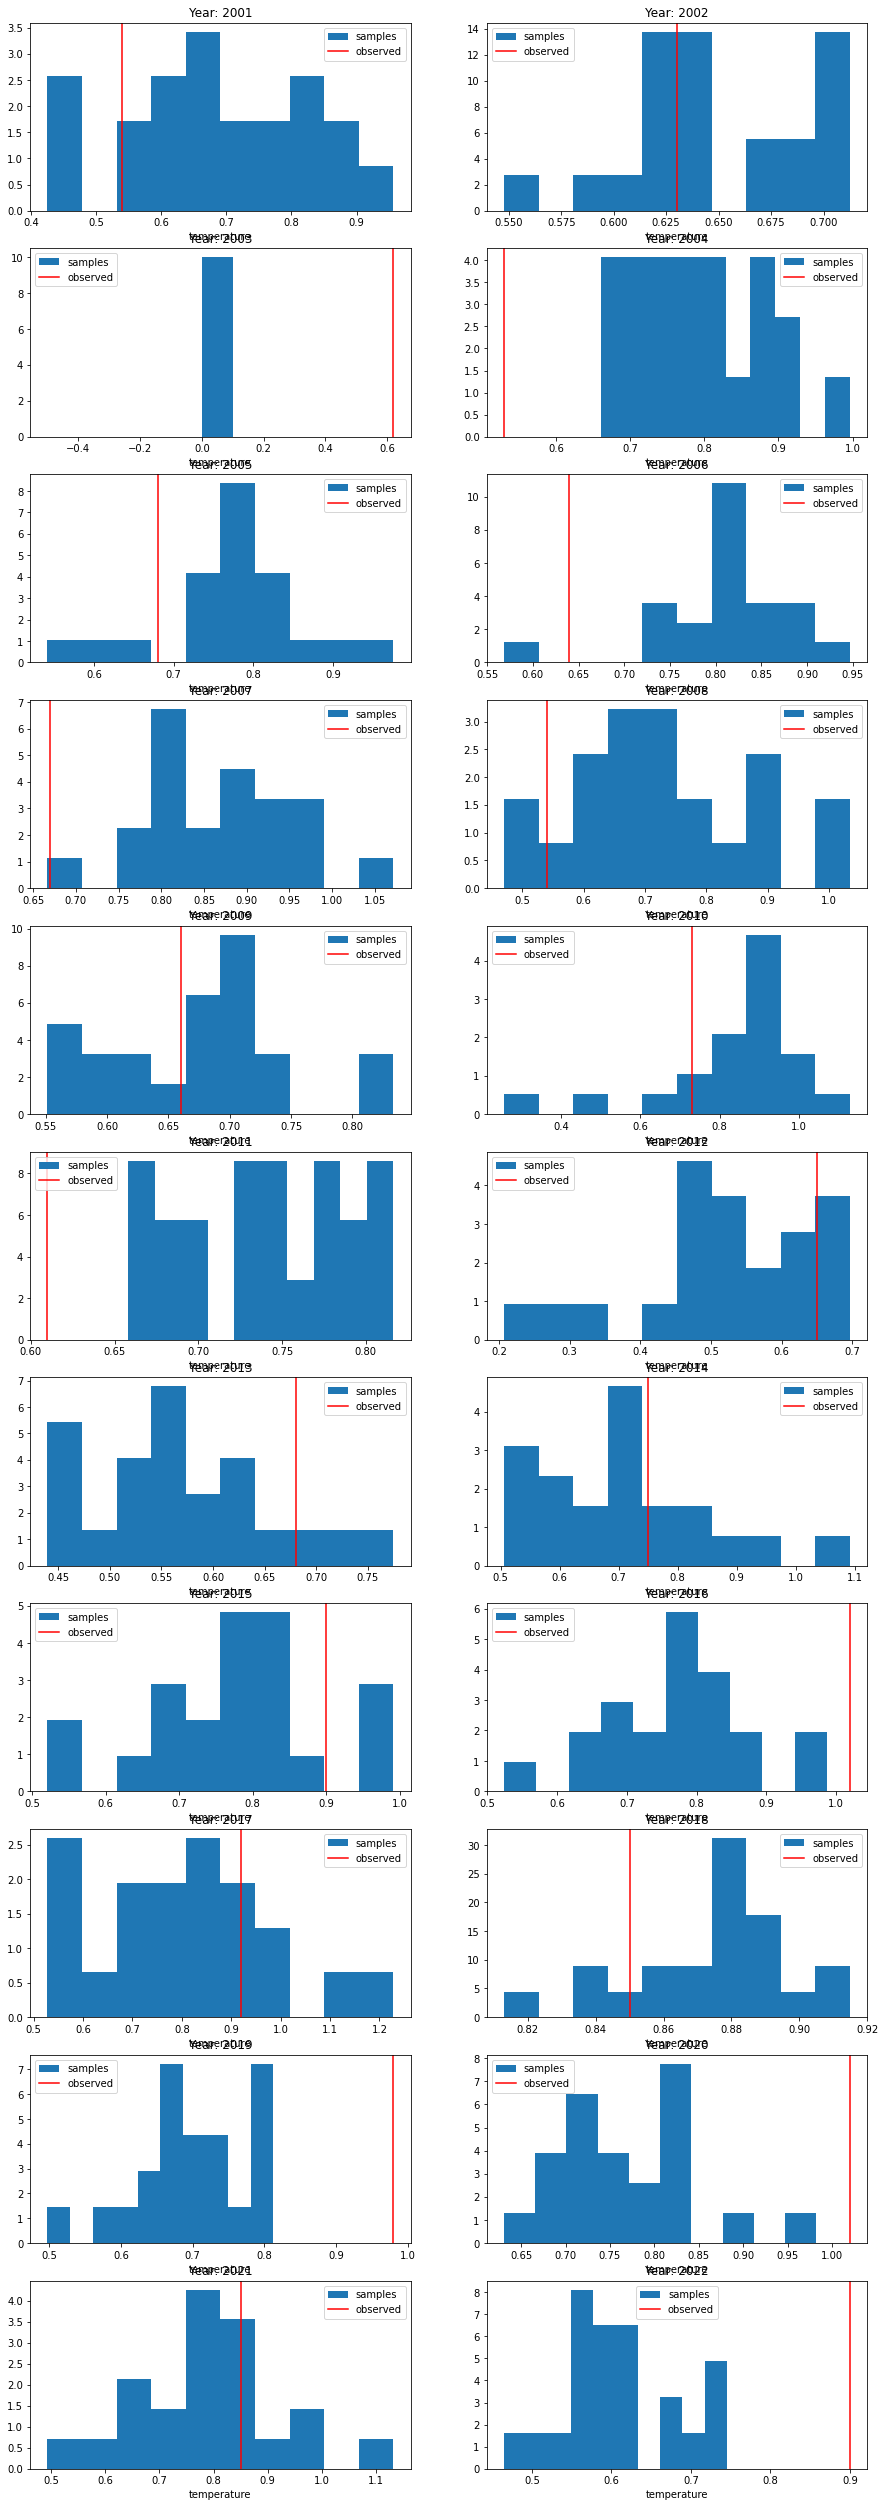

In [31]:
fig, axes = plt.subplots(int(len(df)/2), 2, figsize=(15, 45))
axes = axes.flatten()
print(axes)

for i, ax in enumerate(axes):
    ax.hist(sampled_lambdas[i + 1], density=True, label='samples')
    ax.axvline(x=observed_lambda[i], color='r', label='observed')
    ax.set_xlabel('temperature')
    ax.set_title(f'Year: {years[i]}')
    ax.legend()

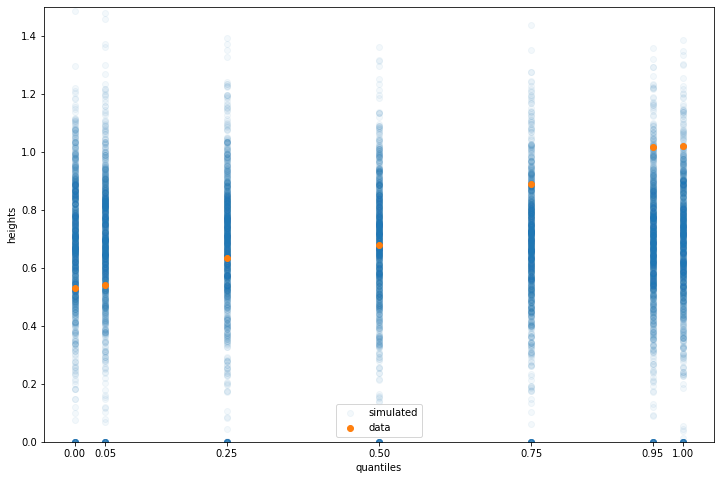

In [32]:
temperature = df_7_p.loc[:, 'temperature[1]':'temperature[22]'].values
q = [0., 0.05, 0.25, 0.5, 0.75, 0.95, 1.]
quantiles = np.quantile(temperature, q, axis=1)
data_quantiles = np.quantile(df.Temperature, q)

plt.figure(figsize=(12, 8))
plt.scatter(q * np.ones((1000, 1)), quantiles, alpha=0.05, label='simulated')
plt.scatter(q, data_quantiles, label='data')
plt.xticks(q)
plt.xlabel('quantiles')
plt.ylabel('heights')
plt.ylim(0,1.5)
plt.legend()
plt.show()

# fit

In [33]:
N = len(df)
data_fit = {'N': N, 'CO2': df.CO2.values[:N], 'temp': df.Temperature.values[:N], 'CH4': df.CH4.values[:N], 'N2O': df.N2O.values[:N]}

In [39]:
%%writefile root/stan_files/temp7_ppc.stan
data {
  int<lower=0> N; // number of data points
  vector[N] CO2;
  vector[N] CH4;
  vector[N] N2O;
  vector[N] temp;
}
parameters {
  real<lower=0> alpha;
  real<lower=0> beta_CO2;
  real<lower=0> beta_CH4;
  real<lower=0> beta_N2O;
  real<lower=0> sigma;
  real<lower=1, upper=80> nu;
}
transformed parameters {
  vector[N] mu;
  mu = alpha + beta_CO2 * CO2 + beta_CH4 * CH4 + beta_N2O * N2O;
}
model {
  nu ~ gamma(2, 0.1); // found this online: Juarez and Steel(2010)
  temp ~ student_t(nu, mu, sigma);
  alpha ~ normal(0.7, 0.1);
  beta_CO2 ~ normal(0, 0.1);
  beta_CH4 ~ normal(0, 0.1);
  beta_N2O ~ normal(0, 0.1);
  sigma ~ normal(0.1,0.05);

}
generated quantities {
    vector[N] temp_i;
    vector[N] log_lik;
    for (i in 1:N) {
        temp_i[i] = student_t_rng(nu,mu[i],sigma);
        log_lik[i] = student_t_lpdf(temp[i] | nu, mu[i], sigma);
    }
}


Overwriting root/stan_files/temp7_ppc.stan


In [40]:
model_ppc7=CmdStanModel(stan_file='root/stan_files/temp7_ppc.stan')
fit7=model_ppc7.sample(data=data_fit,seed=28052020)

INFO:cmdstanpy:compiling stan file /root/stan_files/temp7_ppc.stan to exe file /root/stan_files/temp7_ppc
INFO:cmdstanpy:compiled model executable: /root/stan_files/temp7_ppc
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [41]:
df_7 = fit7.draws_pd()
df_7.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_CO2,beta_CH4,...,log_lik[13],log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22]
0,22.5310,0.954135,0.172102,4.0,15.0,0.0,-20.2791,0.772785,0.024240,0.005160,...,0.739889,1.276850,1.151720,-0.421267,1.25389,1.443910,1.04989,0.823625,0.973348,1.239070
1,19.2412,0.968261,0.172102,4.0,15.0,0.0,-15.5320,0.751469,0.058631,0.045347,...,0.790289,0.970057,1.027570,0.504972,1.11785,0.704547,1.10943,1.104310,-0.530028,-0.526127
2,21.3045,1.000000,0.172102,4.0,15.0,0.0,-16.6494,0.766371,0.009023,0.124608,...,0.935104,1.088320,0.968408,0.297417,1.09484,1.018710,1.09363,1.098220,0.018797,-0.027418
3,26.0354,0.998644,0.172102,4.0,15.0,0.0,-20.9614,0.754060,0.014512,0.074437,...,1.075090,1.389920,1.127990,-0.240374,1.37372,1.295020,1.36784,1.352410,-0.280014,-0.212644
4,24.3075,0.973494,0.172102,4.0,15.0,0.0,-23.2219,0.750499,0.007302,0.038078,...,1.065850,1.494340,1.068610,-0.949558,1.31656,1.521170,1.22014,1.103120,0.327314,0.578640


In [42]:
df_7.describe()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta_CO2,beta_CH4,...,log_lik[13],log_lik[14],log_lik[15],log_lik[16],log_lik[17],log_lik[18],log_lik[19],log_lik[20],log_lik[21],log_lik[22]
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.306429,0.937264,0.169186,4.213500,23.005500,0.0,-21.343809,0.742285,0.049369,0.043218,...,1.090642,1.422599,0.849797,-0.780911,1.142539,1.410290,1.023572,0.898222,0.480777,0.685356
std,1.983733,0.109673,0.003890,0.594564,8.727887,0.0,2.642383,0.019287,0.031584,0.030215,...,0.222378,0.175660,0.288619,0.711276,0.255137,0.198166,0.336030,0.412970,0.587941,0.603049
min,12.917200,0.000004,0.165026,2.000000,3.000000,0.0,-26.897400,0.666833,0.000006,0.000087,...,-0.027679,0.726954,-0.725200,-5.199260,-0.196145,0.384822,-0.806376,-1.499610,-2.936830,-2.824300
25%,23.307850,0.931388,0.165523,4.000000,15.000000,0.0,-23.226975,0.729670,0.023702,0.018205,...,0.956635,1.308523,0.680843,-1.218992,0.999357,1.286393,0.837782,0.673321,0.138284,0.353063
50%,24.695400,0.976472,0.168896,4.000000,31.000000,0.0,-21.755750,0.742561,0.046119,0.038297,...,1.110480,1.428665,0.885073,-0.706043,1.171690,1.424855,1.080425,0.972550,0.565739,0.801744
75%,25.754350,0.993434,0.172558,5.000000,31.000000,0.0,-19.841225,0.755319,0.070756,0.063133,...,1.245325,1.542380,1.056945,-0.256091,1.324412,1.546907,1.262777,1.197975,0.916334,1.132730
max,27.578700,1.000000,0.173927,5.000000,63.000000,0.0,-3.912890,0.816883,0.177157,0.154612,...,1.696540,1.963330,1.542670,0.887751,1.786650,2.019870,1.788170,1.782960,1.766880,1.917680


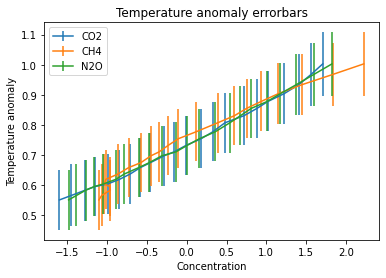

In [43]:
temperature = df_7.loc[:, 'temp_i[1]':f'temp_i[{N}]'].values
y = temperature.mean(axis=0)
x_CO2 = data_fit['CO2']
x_CH4 = data_fit['CH4']
x_N2O = data_fit['N2O']
yerr = temperature.std(axis=0)

# Wykres
plt.errorbar(x_CO2, y, yerr, label='CO2')
plt.errorbar(x_CH4, y, yerr, label='CH4')
plt.errorbar(x_N2O, y, yerr, label='N2O')
plt.xlabel('Concentration')
plt.ylabel('Temperature anomaly')
plt.title('Temperature anomaly errorbars')
plt.legend()
plt.show()

# Model comparison 

In [55]:
print("Summary - Normal model:")
fit.summary()

Summary - Normal model:


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,29.000,0.05200,1.800,25.0000,29.000,31.000,1200.0,2600.0,1.0
alpha,0.740,0.00041,0.020,0.7100,0.740,0.770,2400.0,5200.0,1.0
sigma,0.092,0.00024,0.012,0.0730,0.091,0.110,2600.0,5700.0,1.0
beta_CO2,0.049,0.00064,0.032,0.0046,0.045,0.110,2500.0,5500.0,1.0
beta_CH4,0.042,0.00054,0.030,0.0035,0.037,0.097,3000.0,6600.0,1.0
...,...,...,...,...,...,...,...,...,...
log_lik[18],0.980,0.01100,0.710,-0.4700,1.200,1.600,3910.0,8613.0,1.0
log_lik[19],0.970,0.01100,0.690,-0.4500,1.200,1.600,3980.0,8766.0,1.0
log_lik[20],0.970,0.01200,0.740,-0.4800,1.200,1.600,3759.0,8279.0,1.0


In [56]:
print("Summary - Student model:")
fit7.summary()

Summary - Student model:


,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,24.000,0.05500,2.000,21.0000,25.000,27.000,1300.0,1800.0,1.0
alpha,0.740,0.00038,0.019,0.7100,0.740,0.770,2600.0,3700.0,1.0
beta_CO2,0.049,0.00060,0.032,0.0053,0.046,0.110,2800.0,3900.0,1.0
beta_CH4,0.043,0.00053,0.030,0.0040,0.038,0.099,3200.0,4500.0,1.0
beta_N2O,0.043,0.00059,0.031,0.0040,0.037,0.100,2800.0,3900.0,1.0
...,...,...,...,...,...,...,...,...,...
log_lik[18],1.400,0.00380,0.200,1.1000,1.400,1.700,2688.0,3765.0,1.0
log_lik[19],1.000,0.00580,0.340,0.3900,1.100,1.500,3362.0,4708.0,1.0
log_lik[20],0.900,0.00700,0.410,0.1000,0.970,1.400,3511.0,4918.0,1.0


Values for returned parameters are quite similar. We assumed that in both models that may look alike

In [65]:
fitStudent_ = az.from_cmdstanpy(posterior=fit7,
                           log_likelihood='log_lik',
                           posterior_predictive='temp_i',
                           observed_data={'temperature':df['Temperature']})
fitStudent_

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> observed_data

In [61]:
fitNormal_ = az.from_cmdstanpy(posterior=fit,
                           log_likelihood='log_lik',
                           posterior_predictive='temp_',
                           observed_data={'temperature':df['Temperature']})

In [66]:
az.loo(fitStudent_)

Computed from 4000 by 22 log-likelihood matrix

         Estimate       SE
elpd_loo    20.87     2.62
p_loo        2.55        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)       22  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [67]:
az.waic(fitStudent_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

          Estimate       SE
elpd_waic    20.92     2.60
p_waic        2.51        -

There has been a warning during the calculation. Please check the results.

The model with students distribution gives very similar result for WAIC and LOO

In [68]:
az.loo(fitNormal_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

         Estimate       SE
elpd_loo     6.01     0.73
p_loo       18.99        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          1    4.5%
   (0.7, 1]   (bad)        16   72.7%
   (1, Inf)   (very bad)    5   22.7%

In [69]:
az.waic(fitStudent_)

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 4000 by 22 log-likelihood matrix

          Estimate       SE
elpd_waic    20.92     2.60
p_waic        2.51        -

There has been a warning during the calculation. Please check the results.

In the model with Normal distribution only WAIC is the same as WAIC nad LOO for Student-t model. The reason why LOO and WAIC varies here it is because they have different evaluation strategies. WAIC focus on entire dataset while LOO on every point of data. When it comes to LOO it shows that model is not so good bt focusing on whole dataset the evaluation much better.

## LOO

In [71]:
LOO_compare = az.compare({'Student model':fitStudent_, 'Normal model':fitNormal_}, ic='loo')
LOO_compare

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Student model,0,20.873971,2.553913,0.000000,1.0,2.616999,0.000000,False,log
Normal model,1,6.009034,18.990402,14.864938,0.0,0.731370,2.418414,True,log


Smaller rank indicates which model is better. Here we can see that Student model is much better from the other one. But lets see the output when it comes to whole dataset -WAIC. 

<AxesSubplot:xlabel='Log'>

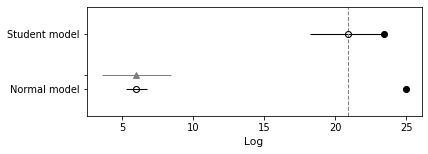

In [72]:
az.plot_compare(LOO_compare)

## WAIC

In [74]:
WAIC_compare = az.compare({'Student model':fitStudent_, 'Gaussian model':fitNormal_}, ic='waic')
WAIC_compare

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Student model,0,20.916747,2.511138,0.000000,1.0,2.602951,0.000000,True,log
Gaussian model,1,13.469474,11.529962,7.447273,0.0,0.163882,2.600035,True,log


Here also the output says that the Student model is better than the Gaussian Model. 

<AxesSubplot:xlabel='Log'>

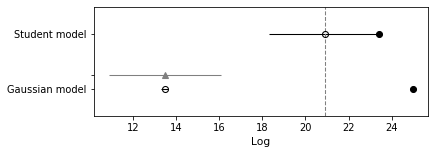

In [75]:
az.plot_compare(WAIC_compare)

With WAIC evaluation the difference is much smaller than with LOO but the better model is still the same. 